# SHREYANSHU PANDEY

# CODSOFT TASK 3

# SALES PREDICTION USING PYTHON

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('sales.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.isnull().values.any()
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
#data visualization

#scatter plot between independent variable and dependent variable

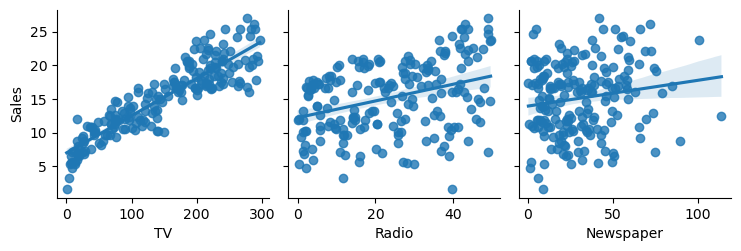

In [15]:
sns.pairplot (df,x_vars=["TV","Radio","Newspaper"],y_vars=["Sales"],kind="reg")

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

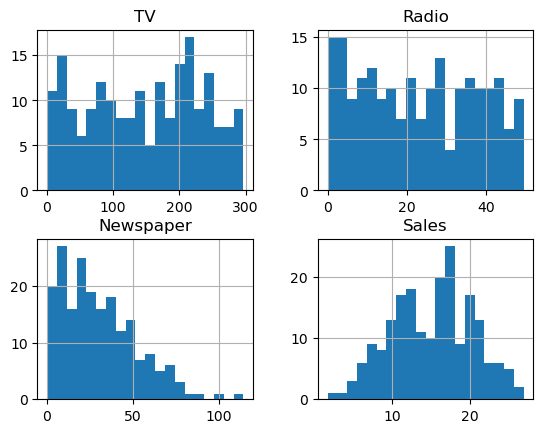

In [16]:
df.hist(bins=20)

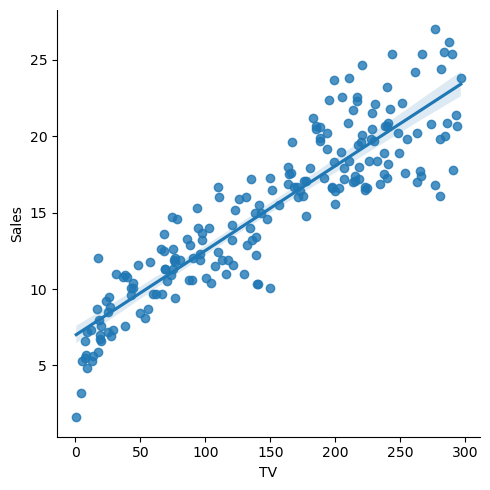

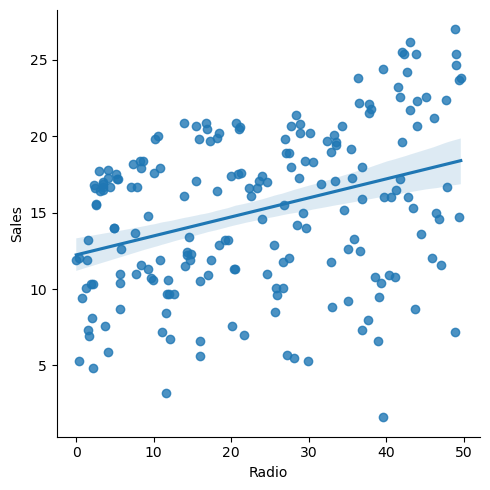

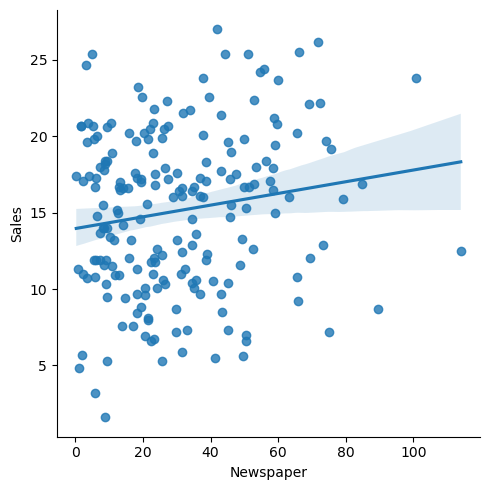

In [21]:
#linear regression plot between each independent and dependent variable
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

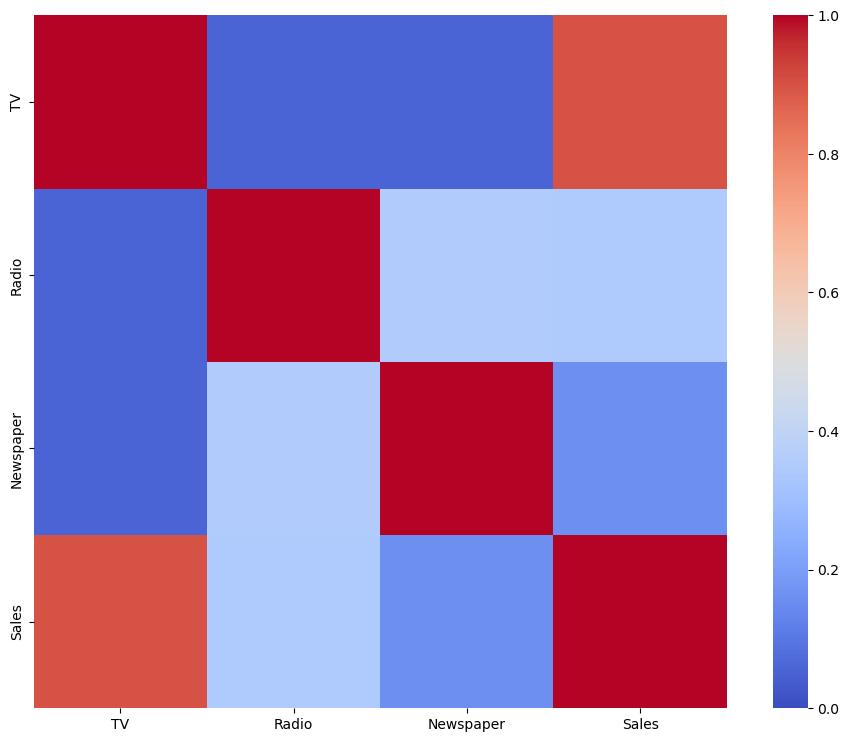

In [24]:
#correlation heatmap
corrheat=df.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrheat, vmin=0, vmax=1, square=True, cmap="coolwarm", ax=ax)
plt.show()

In [26]:
# Model Preparation
from sklearn.model_selection import train_test_split
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [29]:
Sales=df.Sales
Sales

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

# ordinary least square regression formula

In [47]:
from sklearn.preprocessing import LabelEncoder
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df).fit()

In [49]:
print(lin_model.params, "\n")

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64 



In [50]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           8.13e-99
Time:                        05:40:18   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

In [51]:
# Evaluate the model

results = []
names = []


# Define a list of models to evaluate
models = [('LinearRegression', LinearRegression())]

In [52]:
# Loop through each model, fit it to the data, and calculate the RMSE

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.612152


In [53]:
# Make predictions on new data

new_data = pd.DataFrame({'TV': [80], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    14.339239
dtype: float64


In [54]:
# Make predictions on new data

new_data = pd.DataFrame({'TV': [50], 'Radio': [30], 'Newspaper': [20]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    10.564163
dtype: float64
